In [1]:
import pandas as pd
import folium
import numpy as np

we import the dataframe with postal code of the different boroughs and neighborhood with their coordinates (from the first exercices)

In [2]:
df=pd.read_csv('df_all_Toronto.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


In [4]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

we search the Toronto's coordinate in the aim to create the folium map of Toronto :

In [5]:
address = 'Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

/Users/clairelecam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of New York City are 43.6534817, -79.3839347.


In [11]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

map_toronto

we check the different borough to decide the perimeter of the study, we choose only the borough with 'Toronto' in the name:

In [7]:
df['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [8]:
toronto_data = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [9]:
toronto_data.shape

(39, 5)

In [12]:
compteur=0
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    compteur=compteur+1
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

now we will explore these places in Foursquare :

In [13]:
CLIENT_ID = '4I0SOG0HZ1ZS3VMWQSKC2VVLKJY445YRJTHKGHH5LK4BALHC' # your Foursquare ID
CLIENT_SECRET = 'QRJLIHWT2DYA3Q0CI10TUZJTMUZ51GU43PMLPEKV32IIEB3Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4I0SOG0HZ1ZS3VMWQSKC2VVLKJY445YRJTHKGHH5LK4BALHC
CLIENT_SECRET:QRJLIHWT2DYA3Q0CI10TUZJTMUZ51GU43PMLPEKV32IIEB3Q


we make the request for the first line of toronto_data in the aim to know the structure of the json document as result : 

In [14]:
lat=toronto_data.loc[0,'Latitude']
lng=toronto_data.loc[0,'Longitude']
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
results = requests.get(url).json()["response"]['groups'][0]['items']
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '54ea41ad498e9a11e9e13308',
   'name': 'Roselle Desserts',
   'location': {'address': '362 King St E',
    'crossStreet': 'Trinity St',
    'lat': 43.653446723052674,
    'lng': -79.3620167174383,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.653446723052674,
      'lng': -79.3620167174383}],
    'distance': 143,
    'postalCode': 'M5A 1K9',
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['362 King St E (Trinity St)',
     'Toronto ON M5A 1K9',
     'Canada']},
   'categories': [{'id': '4bf58dd8d48988d16a941735',
     'name': 'Bakery',
     'pluralName': 'Bakeries',
     'shortName': 'Bakery',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'grou

In [15]:
def getNearbyVenues(postal_code, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for postal_code,name, lat, lng in zip(postal_code,names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            postal_code, 
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
toronto_venues = getNearbyVenues(postal_code=toronto_data['PostalCode'],
                                   names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )
toronto_venues.head()

,PostalCode,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,"Regent Park , Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,M5A,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,M5A,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


after we noticed that we have as venues 'neighborhood', we decided to drop them of our dataframe:

In [17]:
toronto_venues=toronto_venues[toronto_venues['Venue Category']!='Neighborhood']

we decide to keep as key the postal code because we have different neighborhoods for a postal code and we cannot separe them

In [18]:
toronto_all=toronto_venues.groupby('PostalCode').count()

In [19]:
print(toronto_all.shape)
toronto_all.head()

(39, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
PostalCode,,,,,,,
M4E,4,4,4,4,4,4,4
M4K,43,43,43,43,43,43,43
M4L,20,20,20,20,20,20,20
M4M,39,39,39,39,39,39,39
M4N,3,3,3,3,3,3,3


In [20]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_neighborhood=toronto_venues['PostalCode']
toronto_onehot.head()

,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# add postal code column at the beginn to dataframe
toronto_onehot=pd.concat([toronto_neighborhood,toronto_onehot],axis=1)
toronto_onehot.head()

,PostalCode,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
toronto_grouped.head()

,PostalCode,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,M4E,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,M4K,0.0,0.0,0.0,0.0,0.0,0.0,0.023256,0.0,0.0,...,0.0,0.0,0.023256,0.0,0.0,0.0,0.0,0.000000,0.0,0.023256
2,M4L,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,M4M,0.0,0.0,0.0,0.0,0.0,0.0,0.051282,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.025641,0.0,0.025641
4,M4N,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.to_csv('neighborhoods_venues_sorted.csv')
neighborhoods_venues_sorted.head()

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Coffee Shop,Pub,Trail,Health Food Store,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store
1,M4K,Greek Restaurant,Coffee Shop,Italian Restaurant,Bookstore,Ice Cream Shop,Furniture / Home Store,Fruit & Vegetable Store,Pub,Pizza Place,Lounge
2,M4L,Park,Fast Food Restaurant,Coffee Shop,Pub,Sandwich Place,Light Rail Station,Liquor Store,Italian Restaurant,Burrito Place,Restaurant
3,M4M,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Comfort Food Restaurant,Sandwich Place,Cheese Shop,Clothing Store
4,M4N,Park,Bus Line,Swim School,Deli / Bodega,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


In [25]:
toronto_grouped_clustering = toronto_grouped.drop(columns=['PostalCode'])
toronto_grouped_clustering.head()

,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.023256,0.0,0.0,0.0,...,0.0,0.0,0.023256,0.0,0.0,0.0,0.0,0.000000,0.0,0.023256
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.051282,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.025641,0.0,0.025641
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


we will cluster the differents places. before, we have to define the optimal number of cluster. we will use the elbow method :

In [26]:
Sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k,random_state=0,n_init=30,max_iter=500)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

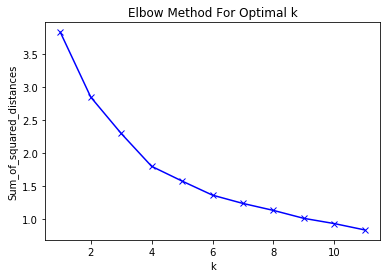

In [27]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### we observe on the plot that the optimal number of clusters ist 4

In [28]:
# set number of clusters
kclusters = 4

# run k-means clusterin
kmeans = KMeans(n_clusters=kclusters, random_state=0,n_init=50,max_iter=500).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 1, 0, 0, 0, 2, 0], dtype=int32)

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('PostalCode'), on='PostalCode')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Park,Bakery,Café,Breakfast Spot,Theater,Beer Store,Ice Cream Shop,Farmers Market
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Diner,Yoga Studio,Creperie,Burger Joint,Burrito Place,Café,College Auditorium,General Entertainment
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Café,Cosmetics Shop,Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Diner
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Cocktail Bar,Italian Restaurant,Gastropub,American Restaurant,Restaurant,Seafood Restaurant,Clothing Store,Moroccan Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Coffee Shop,Pub,Trail,Health Food Store,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store


In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

we notice, that there are main of places are in a cluster.now we analyse if the data in the clusters are similar and give them a name depending theirs contents.

In [31]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0,2] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Pub,Park,Bakery,Café,Breakfast Spot,Theater,Beer Store,Ice Cream Shop,Farmers Market
1,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Diner,Yoga Studio,Creperie,Burger Joint,Burrito Place,Café,College Auditorium,General Entertainment
2,Downtown Toronto,0,Clothing Store,Coffee Shop,Café,Cosmetics Shop,Restaurant,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Diner
3,Downtown Toronto,0,Café,Coffee Shop,Cocktail Bar,Italian Restaurant,Gastropub,American Restaurant,Restaurant,Seafood Restaurant,Clothing Store,Moroccan Restaurant
4,East Toronto,0,Coffee Shop,Pub,Trail,Health Food Store,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store
5,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Bakery,Restaurant,Beer Bar,Café,Cheese Shop,Seafood Restaurant,Cosmetics Shop,Concert Hall
6,Downtown Toronto,0,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Ice Cream Shop,Bar,Salad Place,Thai Restaurant,Burger Joint,Bubble Tea Shop
7,Downtown Toronto,0,Grocery Store,Café,Park,Baby Store,Italian Restaurant,Restaurant,Nightclub,Coffee Shop,Candy Store,Diner
8,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Clothing Store,Deli / Bodega,Hotel,Gym,Thai Restaurant,Bookstore,Salad Place
9,West Toronto,0,Pharmacy,Bakery,Park,Liquor Store,Café,Middle Eastern Restaurant,Bar,Bank,Brewery,Pool


we observe that we have mainly cafe,bar and different restaurants in this cluster. we notice that we have few of them which are differents for example M5V with airport, but when we update to 5 clusters there is no difference with this cluster. We name this cluster 'cafe_restaurant_neighborhood'.

In [32]:
cafe_restaurant_neighborhood=toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0,2] + list(range(5, toronto_merged.shape[1]))]]

In [33]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0,2] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,1,Park,Bus Line,Swim School,Deli / Bodega,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
21,Central Toronto,1,Park,Jewelry Store,Trail,Sushi Restaurant,Yoga Studio,Deli / Bodega,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant
33,Downtown Toronto,1,Park,Playground,Trail,Dance Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [34]:
park_neighborhood=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0,2] + list(range(5, toronto_merged.shape[1]))]]

In [35]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0,2] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,2,Playground,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


In [36]:
playground_neighboorhood=toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0,2] + list(range(5, toronto_merged.shape[1]))]]

In [37]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0,2] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,3,Garden,Ice Cream Shop,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [38]:
garden_neighborhood=toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0,2] + list(range(5, toronto_merged.shape[1]))]]